<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Practice_Activity_Penguin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins

df = load_penguins()


y = df['bill_depth_mm']
X = df.drop(columns=['bill_depth_mm'])

X = pd.get_dummies(X, drop_first=True)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [26]:
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna()

y = df_cleaned['species']
X = df_cleaned.drop(columns=['species'])

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("Class distribution in original y:", y.value_counts(normalize=True))
print("Class distribution in y_train:", y_train.value_counts(normalize=True))
print("Class distribution in y_test:", y_test.value_counts(normalize=True))

Shape of X_train: (233, 8)
Shape of X_test: (100, 8)
Shape of y_train: (233,)
Shape of y_test: (100,)
Class distribution in original y: species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64
Class distribution in y_train: species
Adelie       0.437768
Gentoo       0.356223
Chinstrap    0.206009
Name: proportion, dtype: float64
Class distribution in y_test: species
Adelie       0.44
Gentoo       0.36
Chinstrap    0.20
Name: proportion, dtype: float64


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

knn_model_1 = KNeighborsClassifier(n_neighbors=3)

knn_model_1.fit(X_train, y_train)

y_pred_knn1 = knn_model_1.predict(X_test)

y_pred_proba_knn1 = knn_model_1.predict_proba(X_test)

print("Confusion Matrix for kNN (k=3):", confusion_matrix(y_test, y_pred_knn1))

accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)
print("Overall Accuracy for kNN (k=3):", accuracy_knn1)

print("Classification Report for kNN (k=3):", classification_report(y_test, y_pred_knn1, target_names=y_test.unique()))


class_labels = knn_model_1.classes_
roc_auc_knn1 = roc_auc_score(y_test, y_pred_proba_knn1, multi_class='ovr', average='macro', labels=class_labels)
print("Macro-averaged ROC AUC for kNN (k=3):", roc_auc_knn1)

Confusion Matrix for kNN (k=3): [[37  4  3]
 [ 9 10  1]
 [ 4  0 32]]
Overall Accuracy for kNN (k=3): 0.79
Classification Report for kNN (k=3):               precision    recall  f1-score   support

   Chinstrap       0.74      0.84      0.79        44
      Gentoo       0.71      0.50      0.59        20
      Adelie       0.89      0.89      0.89        36

    accuracy                           0.79       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.79      0.78       100

Macro-averaged ROC AUC for kNN (k=3): 0.874767316017316


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

knn_model_2 = KNeighborsClassifier(n_neighbors=5)

knn_model_2.fit(X_train, y_train)

y_pred_knn2 = knn_model_2.predict(X_test)

y_pred_proba_knn2 = knn_model_2.predict_proba(X_test)

print("Confusion Matrix for kNN (k=5):", confusion_matrix(y_test, y_pred_knn2))

accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)
print("Overall Accuracy for kNN (k=5):", accuracy_knn2)

print("Classification Report for kNN (k=5):", classification_report(y_test, y_pred_knn2, target_names=y_test.unique()))

class_labels_knn2 = knn_model_2.classes_
roc_auc_knn2 = roc_auc_score(y_test, y_pred_proba_knn2, multi_class='ovr', average='macro', labels=class_labels_knn2)
print("Macro-averaged ROC AUC for kNN (k=5):", roc_auc_knn2)

Confusion Matrix for kNN (k=5): [[38  3  3]
 [12  7  1]
 [ 3  0 33]]
Overall Accuracy for kNN (k=5): 0.78
Classification Report for kNN (k=5):               precision    recall  f1-score   support

   Chinstrap       0.72      0.86      0.78        44
      Gentoo       0.70      0.35      0.47        20
      Adelie       0.89      0.92      0.90        36

    accuracy                           0.78       100
   macro avg       0.77      0.71      0.72       100
weighted avg       0.78      0.78      0.76       100

Macro-averaged ROC AUC for kNN (k=5): 0.8866568587662337


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

dtc_model_1 = DecisionTreeClassifier(max_depth=3, random_state=42)

dtc_model_1.fit(X_train, y_train)

y_pred_dtc1 = dtc_model_1.predict(X_test)

y_pred_proba_dtc1 = dtc_model_1.predict_proba(X_test)

print("Confusion Matrix for Decision Tree (max_depth=3):", confusion_matrix(y_test, y_pred_dtc1))

accuracy_dtc1 = accuracy_score(y_test, y_pred_dtc1)
print("Overall Accuracy for Decision Tree (max_depth=3):", accuracy_dtc1)

print("Classification Report for Decision Tree (max_depth=3):", classification_report(y_test, y_pred_dtc1, target_names=y_test.unique()))


class_labels_dtc1 = dtc_model_1.classes_
roc_auc_dtc1 = roc_auc_score(y_test, y_pred_proba_dtc1, multi_class='ovr', average='macro', labels=class_labels_dtc1)
print("Macro-averaged ROC AUC for Decision Tree (max_depth=3):", roc_auc_dtc1)

Confusion Matrix for Decision Tree (max_depth=3): [[44  0  0]
 [ 0 20  0]
 [ 2  0 34]]
Overall Accuracy for Decision Tree (max_depth=3): 0.98
Classification Report for Decision Tree (max_depth=3):               precision    recall  f1-score   support

   Chinstrap       0.96      1.00      0.98        44
      Gentoo       1.00      1.00      1.00        20
      Adelie       1.00      0.94      0.97        36

    accuracy                           0.98       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Macro-averaged ROC AUC for Decision Tree (max_depth=3): 0.9842472342472343


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

dtc_model_2 = DecisionTreeClassifier(max_depth=5, random_state=42)

dtc_model_2.fit(X_train, y_train)

y_pred_dtc2 = dtc_model_2.predict(X_test)

y_pred_proba_dtc2 = dtc_model_2.predict_proba(X_test)

print("Confusion Matrix for Decision Tree (max_depth=5):", confusion_matrix(y_test, y_pred_dtc2))

accuracy_dtc2 = accuracy_score(y_test, y_pred_dtc2)
print("Overall Accuracy for Decision Tree (max_depth=5):", accuracy_dtc2)

print("Classification Report for Decision Tree (max_depth=5):", classification_report(y_test, y_pred_dtc2, target_names=y_test.unique()))

class_labels_dtc2 = dtc_model_2.classes_
roc_auc_dtc2 = roc_auc_score(y_test, y_pred_proba_dtc2, multi_class='ovr', average='macro', labels=class_labels_dtc2)
print("Macro-averaged ROC AUC for Decision Tree (max_depth=5):", roc_auc_dtc2)

Confusion Matrix for Decision Tree (max_depth=5): [[41  3  0]
 [ 0 20  0]
 [ 2  0 34]]
Overall Accuracy for Decision Tree (max_depth=5): 0.95
Classification Report for Decision Tree (max_depth=5):               precision    recall  f1-score   support

   Chinstrap       0.95      0.93      0.94        44
      Gentoo       0.87      1.00      0.93        20
      Adelie       1.00      0.94      0.97        36

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.95      0.95      0.95       100

Macro-averaged ROC AUC for Decision Tree (max_depth=5): 0.9671747234247233


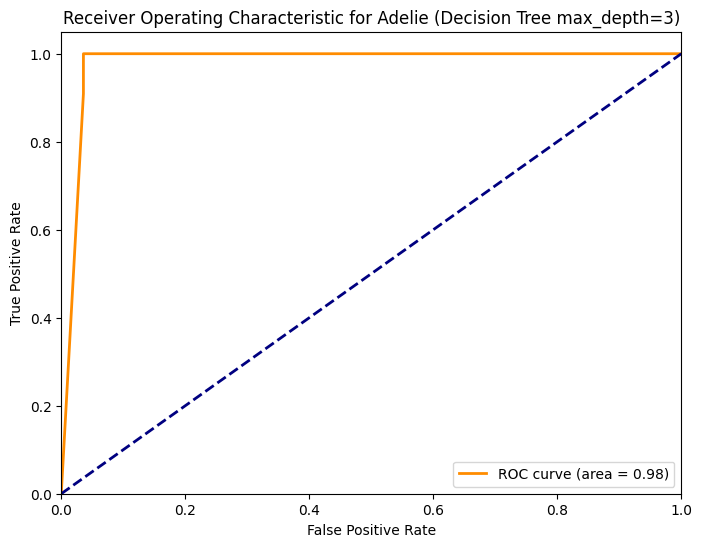

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

model_to_plot = dtc_model_1
y_pred_proba_to_plot = y_pred_proba_dtc1
chosen_species = 'Adelie'

class_labels_dtc1 = model_to_plot.classes_
species_index = np.where(class_labels_dtc1 == chosen_species)[0][0]

y_test_binarized = (y_test == chosen_species).astype(int)

y_score = y_pred_proba_to_plot[:, species_index]

fpr, tpr, thresholds = roc_curve(y_test_binarized, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = ' + str(round(roc_auc, 2)) + ')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for ' + chosen_species + ' (Decision Tree max_depth=3)')
plt.legend(loc="lower right")
plt.show()